# Import relevant libraries 

In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

# Creating dataset and saving it

In [2]:
observations=10000
xs=np.random.uniform(-10,20,observations)
zs=np.random.uniform(-20,25,observations)
inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,observations)
targets=2*xs-3*zs+4+noise
targets=targets.reshape(10000,1).round(1)
np.savez('data_set',input=inputs,target=targets)

# Loading dataset file

In [3]:
data_set=np.load('data_set.npz')
data_set['target'].shape

(10000, 1)

# Creating, customizing & training the model

In [4]:
input_size=2
output_size=1

model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),
                         bias_initializer=tf.random_uniform_initializer(-0.1,0.1),
                         )
])

custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.002)
model.compile(custom_optimizer,'mean_squared_error')
model.fit(data_set['input'],data_set['target'],epochs=10,verbose=2)

Train on 10000 samples
Epoch 1/10
10000/10000 - 1s - loss: 13.1543
Epoch 2/10
10000/10000 - 0s - loss: 1.2269
Epoch 3/10
10000/10000 - 0s - loss: 0.4864
Epoch 4/10
10000/10000 - 1s - loss: 0.3653
Epoch 5/10
10000/10000 - 0s - loss: 0.3464
Epoch 6/10
10000/10000 - 0s - loss: 0.3436
Epoch 7/10
10000/10000 - 0s - loss: 0.3417
Epoch 8/10
10000/10000 - 0s - loss: 0.3436
Epoch 9/10
10000/10000 - 0s - loss: 0.3429
Epoch 10/10
10000/10000 - 0s - loss: 0.3440


In [5]:
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]
weights

array([[ 1.9966239],
       [-3.003393 ]], dtype=float32)

In [6]:
biases

array([4.011474], dtype=float32)

# Printing what our model predicts and comparing it with calculated targets

In [7]:
predict=np.array(model.predict_on_batch(data_set['input']))
predict.round(1)

array([[ 11.6],
       [-63. ],
       [-32.7],
       ...,
       [-27.1],
       [ -0.1],
       [ 63.1]], dtype=float32)

# Printing Targets

In [8]:
data_set['target']

array([[ 11.6],
       [-63. ],
       [-33.5],
       ...,
       [-27.6],
       [ -1.1],
       [ 63.8]])

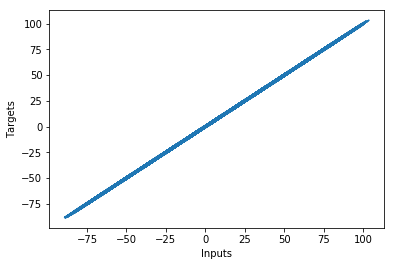

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(data_set['input'])),np.squeeze(data_set['target']))
plt.xlabel('Inputs')
plt.ylabel('Targets')
plt.show()